<a href="https://colab.research.google.com/github/DL-WG/ROMS-tutorial/blob/main/MNIST_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST with PCA example
Wednesday 3rd March 2021

In [25]:
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
!pip install eofs
import eofs
from eofs.standard import Eof
import numpy as np

In [30]:
#Load data
(Xtrain, ytrain), (Xtest, ytest) = load_data()
# summarize the shape of the dataset
print('Train', Xtrain.shape, ytrain.shape)
print('Test', Xtest.shape, ytest.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 60000 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


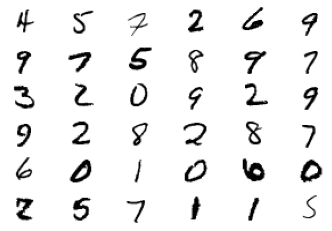

In [31]:
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.imshow(Xtrain[np.random.random_integers(Xtrain.shape[0])], cmap='gray_r')
  plt.axis('off')


In [32]:
#Reshape data
modelData = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1]*Xtrain.shape[2]))


In [38]:
#Standardise data
meanData = np.mean(modelData, axis = 0)
stdData = np.std(modelData)
modelDataScaled = (modelData - meanData)/stdData


78.56748998339798


In [58]:
#PCA analysis

solver = Eof(modelDataScaled)

varianceCumulative = np.cumsum(solver.varianceFraction())
eigenvalues = solver.eigenvalues()
pcs = solver.pcs()
eof = solver.eofs()

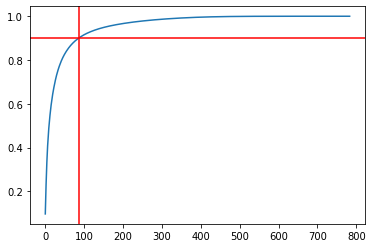

In [64]:
#set desired explained variance
targetVariance = 0.90

minPCs = np.min(np.where(varianceCumulative>targetVariance))
plt.plot(varianceCumulative)
plt.axvline(minPCs, color='r')
plt.axhline(targetVariance, color='r')